# ITCS498 - Project Adastra
## MR. KRITTIN CHATRINAN 6088022
## MR. SUNAT PRAPHANWONG 6088130
## MR. ARCHAWAT SILACHOTE 6088168

**Extract dataset+model.zip for the dataset and model to run the specific part of the notebook**

**or**

**Run the entire notebook**

# Introduction

Currently, one of the global problems that every country must deal with is the increase of PM2.5. For this project, we have the opportunity to manage the air quality data that was received from the Adastra company and try to analyze the data for predicting the air quality in the next 6 months. Therefore, we have used principles of data management, and analysis through various models to provide the most accurate predictions for this project.

In [40]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers.default='png+pdf'

In [41]:
df = pd.read_csv("dataset/02-Dataset v0.02.csv")
df

C:\Users\Sunat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1.0,1,81.79,0
1,2016-01-20 16:00:00,2.0,1,106.47,0
2,2016-01-20 16:00:00,3.0,1,121.81,0
3,2016-01-20 16:00:00,4.0,1,140.35,0
4,2016-01-20 16:00:00,5.0,1,25.27,0
...,...,...,...,...,...
1252194,2018-06-19 10:00:00,5.0,10,0.00,0
1252195,2018-06-19 10:00:00,5.0,11,0.00,0
1252196,2018-06-19 10:00:00,6.0,9,0.00,0
1252197,2018-06-19 10:00:00,6.0,10,0.00,0


### Fixing some invalid value in the data

In [42]:
df.iloc[1218470:1218480]

,timest,station,param,level,isinvalid
1218470,2018-05-27 21:00:00,3.0,11,0.00,0
1218471,2018-05-27 21:00:00,4.0,9,1.31,0
1218472,2018-05-27 21:00:00,4.0,10,16.13,0
1218473,2018-05-27 21:00:00,4.0,11,0.00,0
1218474,2018-05-27 21:00:00,5.0,9,4.23,0
1218475,2018-05-27 21:00:00,5.0,10,0.00,0
1218476,2018-05-27 21:00:00,5.0,11,0.00,0
1218477,2018-05-27 21:00:00,-1.0,9,0.00,0
1218478,2018-05-27 21:00:00,6.0,10,0.00,0
1218479,2018-05-27 21:00:00,6.0,11,0.00,0


In [43]:
df.at[1218477,'station'] = 6
df.iloc[1218470:1218480]

,timest,station,param,level,isinvalid
1218470,2018-05-27 21:00:00,3.0,11,0.00,0
1218471,2018-05-27 21:00:00,4.0,9,1.31,0
1218472,2018-05-27 21:00:00,4.0,10,16.13,0
1218473,2018-05-27 21:00:00,4.0,11,0.00,0
1218474,2018-05-27 21:00:00,5.0,9,4.23,0
1218475,2018-05-27 21:00:00,5.0,10,0.00,0
1218476,2018-05-27 21:00:00,5.0,11,0.00,0
1218477,2018-05-27 21:00:00,6.0,9,0.00,0
1218478,2018-05-27 21:00:00,6.0,10,0.00,0
1218479,2018-05-27 21:00:00,6.0,11,0.00,0


### Convert timest column to datetime

In [44]:
df.timest = pd.to_datetime(df.timest, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252199 entries, 0 to 1252198
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timest     1252197 non-null  datetime64[ns]
 1   station    1252198 non-null  float64       
 2   param      1252199 non-null  int64         
 3   level      1252198 non-null  float64       
 4   isinvalid  1252199 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 47.8+ MB


In [45]:
df.iloc[631481:631484]

,timest,station,param,level,isinvalid
631481,2017-04-18,5.0,9,0.0,0
631482,2020-04-18,5.0,10,0.0,0
631483,2017-04-18,5.0,11,0.0,0


In [46]:
df.at[631482, 'timest'] = df.iloc[631482].timest.replace(year=2017)
df.iloc[631481:631484]

,timest,station,param,level,isinvalid
631481,2017-04-18,5.0,9,0.0,0
631482,2017-04-18,5.0,10,0.0,0
631483,2017-04-18,5.0,11,0.0,0


In [47]:
df.isnull().sum()

timest       2
station      1
param        0
level        1
isinvalid    0
dtype: int64

# Preparing the data

"isinvalid" column dtype is object, it mean that there are multiple type of data in this column, so convert them to numeric

In [48]:
print(df.isinvalid.unique())
print(df.isinvalid.value_counts())

[0 1 2 '0' '1' 'no']
0     1170215
0       71439
1        9432
1        1111
no          1
2           1
Name: isinvalid, dtype: int64


In [49]:
mapper = {
    0 : 0,
    1 : 1,
    2 : 1,
    '0' : 0,
    '1' : 1,
    'no' : 0
}

df.isinvalid = df.isinvalid.map(mapper)
print(df.isinvalid.unique())
print(df.isinvalid.value_counts())

[0 1]
0    1241655
1      10544
Name: isinvalid, dtype: int64


**Mark all invalid value as missing value**

In [50]:
df.loc[df.isinvalid == 1, 'level'] = np.nan
df.level.isnull().sum()

10545

**Drop isinvalid column**

In [51]:
df.drop('isinvalid', axis=1, inplace=True)
df.head()

,timest,station,param,level
0,2016-01-20 16:00:00,1.0,1,81.79
1,2016-01-20 16:00:00,2.0,1,106.47
2,2016-01-20 16:00:00,3.0,1,121.81
3,2016-01-20 16:00:00,4.0,1,140.35
4,2016-01-20 16:00:00,5.0,1,25.27


## Fill missing value

In [52]:
df.loc[df[['timest', 'station', 'param']].isnull().any(axis=1)]

,timest,station,param,level
370932,2016-10-29 09:00:00,NaN,6,4.32
518048,NaT,2.0,11,-6.20
1165067,NaT,5.0,5,116.88


In [53]:
df.iloc[518045:518050].append(df.iloc[1165065:1165070])

,timest,station,param,level
518045,2017-02-02 05:00:00,2.0,7,87.95
518046,2017-02-02 05:00:00,2.0,6,8.84
518047,2017-02-02 05:00:00,2.0,9,0.38
518048,NaT,2.0,11,-6.20
518049,2017-02-02 05:00:00,2.0,0,360.29
1165065,2018-04-22 15:00:00,5.0,8,864.00
1165066,2018-04-22 15:00:00,5.0,4,0.14
1165067,NaT,5.0,5,116.88
1165068,2018-04-22 15:00:00,5.0,7,19.88
1165069,2018-04-22 15:00:00,5.0,6,5.98


In [54]:
df.timest = df.timest.fillna(method='backfill')
df.iloc[518045:518050].append(df.iloc[1165065:1165070])

,timest,station,param,level
518045,2017-02-02 05:00:00,2.0,7,87.95
518046,2017-02-02 05:00:00,2.0,6,8.84
518047,2017-02-02 05:00:00,2.0,9,0.38
518048,2017-02-02 05:00:00,2.0,11,-6.20
518049,2017-02-02 05:00:00,2.0,0,360.29
1165065,2018-04-22 15:00:00,5.0,8,864.00
1165066,2018-04-22 15:00:00,5.0,4,0.14
1165067,2018-04-22 15:00:00,5.0,5,116.88
1165068,2018-04-22 15:00:00,5.0,7,19.88
1165069,2018-04-22 15:00:00,5.0,6,5.98


In [55]:
df.iloc[370930:370940]

,timest,station,param,level
370930,2016-10-29 09:00:00,3.0,5,5.05
370931,2016-10-29 09:00:00,3.0,7,72.00
370932,2016-10-29 09:00:00,NaN,6,4.32
370933,2016-10-29 09:00:00,3.0,0,33.99
370934,2016-10-29 09:00:00,6.0,1,42.51
370935,2016-10-29 09:00:00,6.0,2,62.14
370936,2016-10-29 09:00:00,6.0,3,3.21
370937,2016-10-29 09:00:00,6.0,4,1.09
370938,2016-10-29 09:00:00,6.0,7,78.33
370939,2016-10-29 09:00:00,6.0,6,7.67


In [56]:
df.station = df.station.fillna(method="backfill")
df.iloc[370930:370940]

,timest,station,param,level
370930,2016-10-29 09:00:00,3.0,5,5.05
370931,2016-10-29 09:00:00,3.0,7,72.00
370932,2016-10-29 09:00:00,3.0,6,4.32
370933,2016-10-29 09:00:00,3.0,0,33.99
370934,2016-10-29 09:00:00,6.0,1,42.51
370935,2016-10-29 09:00:00,6.0,2,62.14
370936,2016-10-29 09:00:00,6.0,3,3.21
370937,2016-10-29 09:00:00,6.0,4,1.09
370938,2016-10-29 09:00:00,6.0,7,78.33
370939,2016-10-29 09:00:00,6.0,6,7.67


## Transform Table
So each param has it own column

In [57]:
df = df.set_index(['timest', 'station'])
df.head()

param   level
timest              station               
2016-01-20 16:00:00 1.0          1   81.79
                    2.0          1  106.47
                    3.0          1  121.81
                    4.0          1  140.35
                    5.0          1   25.27

**Map each param to their names**

In [58]:
param_dict = {
    0: 'PM',
    1: 'NO2',
    2: 'NO',
    3: 'C6H6',
    4: 'CO',
    5: 'O3',
    6: 'SO2',
    7: 'Humidity',
    8: 'Atmosphere Pressure',
    9: 'Wind',
    10: 'Sunshine',
    11: 'Temperature'
}

df.param = df.param.map(param_dict)
df.param.unique()

array(['NO2', 'NO', 'Atmosphere Pressure', 'C6H6', 'CO', 'O3', 'Humidity',
       'SO2', 'Wind', 'Sunshine', 'Temperature', 'PM'], dtype=object)

**Group Each Param togetothers**

In [59]:
df_group = df.groupby('param')
param_list = [(x, pd.DataFrame(y)) for x,y in df_group]
len(param_list)

12

In [60]:
for param, df_param in param_list:
    df_param.rename(columns={'level': param}, inplace=True)
    df_param.drop('param', axis=1, inplace=True)
param_list = [dataframe for _, dataframe in param_list]
param_list[0]

Atmosphere Pressure
timest              station                     
2016-01-20 16:00:00 1.0                   926.83
                    3.0                   933.33
                    4.0                   945.00
                    5.0                   859.09
2016-01-20 17:00:00 1.0                   926.83
...                                          ...
2018-06-19 08:00:00 3.0                   915.66
2018-06-19 09:00:00 4.0                   944.10
                    1.0                   944.10
                    3.0                   915.66
2018-06-19 10:00:00 4.0                   944.10

[77653 rows x 1 columns]

In [61]:
for index, df_param in enumerate(param_list):
    df_temp = df_param[df_param.index.duplicated(keep=False)]
    if df_temp.size != 0:
        print(index)
        display(df_temp)

3


Humidity
timest     station          
2017-04-18 2.0         92.27
           2.0         92.27

**There is duplicated index in Humidity table. Remove it!**

In [62]:
param_list[3] = param_list[3].loc[~param_list[3].index.duplicated(keep='first')]
param_list[3][param_list[3].index.duplicated(keep=False)]

,,Humidity
timest,station,


## Join to Final Table

In [63]:
df_new = pd.concat(param_list, axis=1, join='outer', sort=False)
df_new

Atmosphere Pressure   C6H6    CO  Humidity  \
timest              station                                               
2016-01-20 16:00:00 1.0                   926.83   7.47   NaN     66.90   
                    2.0                      NaN    NaN   NaN     70.29   
                    3.0                   933.33  11.74  2.08     59.65   
                    4.0                   945.00  16.76  2.05     66.38   
                    5.0                   859.09   0.16  0.69     75.74   
...                                          ...    ...   ...       ...   
2018-06-19 10:00:00 2.0                      NaN    NaN   NaN       NaN   
                    3.0                      NaN    NaN   NaN       NaN   
                    4.0                   944.10   0.20  0.33     73.68   
                    5.0                      NaN    NaN   NaN       NaN   
                    6.0                      NaN    NaN   NaN       NaN   

                                NO     NO2     O3      PM    SO2  Sunshine  \
timest              station                                                  
2016-01-20 16:00:00 1.0      14.74   81.79  41.10  209.94  10.68    127.27   
                    2.0      27.44  106.47  35.05  125.72  16.14    222.78   
                    3.0      56.76  121.81  11.12  214.46  19.88    257.83   
                    4.0      55.48  140.35  16.99  252.75  35.23     56.84   
                    5.0       6.52   25.27  73.74   72.31  44.02    118.83   
...                            ...     ...    ...     ...    ...       ...   
2018-06-19 10:00:00 2.0        NaN     NaN    NaN     NaN    NaN      0.00   
                    3.0        NaN     NaN    NaN     NaN    NaN      0.00   
                    4.0       6.74   21.77  63.46   22.28   0.34    470.49   
                    5.0        NaN     NaN    NaN     NaN    NaN      0.00   
                    6.0        NaN     NaN    NaN     NaN    NaN      0.00   

                             Temperature   Wind  
timest              station                      
2016-01-20 16:00:00 1.0            -8.43   1.42  
                    2.0            -9.04   0.86  
                    3.0            -2.92   0.58  
                    4.0            -5.96   1.01  
                    5.0            -1.67  29.84  
...                                  ...    ...  
2018-06-19 10:00:00 2.0             0.00   0.00  
                    3.0             0.00   0.00  
                    4.0            19.76   1.56  
                    5.0             0.00   0.00  
                    6.0             0.00   0.00  

[119645 rows x 12 columns]

In [64]:
df_new = df_new.reset_index(level=['station'])

In [65]:
df_new.isnull().sum()

station                    0
Atmosphere Pressure    43725
C6H6                   41399
CO                     44712
Humidity                5203
NO                      6624
NO2                     6537
O3                     23839
PM                      8350
SO2                     4032
Sunshine                1796
Temperature             1796
Wind                    6074
dtype: int64

In [66]:
df_new.to_csv('dataset/transformed_data.csv')

**save the data for later use**

## Imputation

### Load data

In [67]:
df_missing = pd.read_csv('dataset/transformed_data.csv', index_col="timest", parse_dates=True)
display(df_missing)
df_missing.isnull().sum()

,station,Atmosphere Pressure,C6H6,CO,Humidity,NO,NO2,O3,PM,SO2,Sunshine,Temperature,Wind
timest,,,,,,,,,,,,,
2016-01-20 16:00:00,1.0,926.83,7.47,NaN,66.90,14.74,81.79,41.10,209.94,10.68,127.27,-8.43,1.42
2016-01-20 16:00:00,2.0,NaN,NaN,NaN,70.29,27.44,106.47,35.05,125.72,16.14,222.78,-9.04,0.86
2016-01-20 16:00:00,3.0,933.33,11.74,2.08,59.65,56.76,121.81,11.12,214.46,19.88,257.83,-2.92,0.58
2016-01-20 16:00:00,4.0,945.00,16.76,2.05,66.38,55.48,140.35,16.99,252.75,35.23,56.84,-5.96,1.01
2016-01-20 16:00:00,5.0,859.09,0.16,0.69,75.74,6.52,25.27,73.74,72.31,44.02,118.83,-1.67,29.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-19 10:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00
2018-06-19 10:00:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00
2018-06-19 10:00:00,4.0,944.10,0.20,0.33,73.68,6.74,21.77,63.46,22.28,0.34,470.49,19.76,1.56


station                    0
Atmosphere Pressure    43725
C6H6                   41399
CO                     44712
Humidity                5203
NO                      6624
NO2                     6537
O3                     23839
PM                      8350
SO2                     4032
Sunshine                1796
Temperature             1796
Wind                    6074
dtype: int64

### Encode and Impute PM column

In [68]:
from sklearn.impute import KNNImputer

def encode_time_cyclical(datetime_col):
    year_col = datetime_col.apply(lambda x: x.year)
    month_col = datetime_col.apply(lambda x: x.month)
    day_col = datetime_col.apply(lambda x: x.day)
    hour_col = datetime_col.apply(lambda x: x.hour)
    month_sin = np.sin(2*np.pi*(month_col/12))
    month_cos = np.cos(2*np.pi*(month_col/12))
    day_sin = np.sin(2*np.pi*(day_col/31))
    day_cos = np.cos(2*np.pi*(day_col/31))
    hour_sin = np.sin(2*np.pi*(hour_col/24))
    hour_cos = np.cos(2*np.pi*(hour_col/24))
    return pd.DataFrame({
        'year': year_col, 
        'moth_sin': month_sin, 
        'month_cos': month_cos, 
        'day_sin': day_sin, 
        'day_cos': day_cos, 
        'hour_sin': hour_sin,
        'hour_cos': hour_cos
    })

def impute_missing(data, features):
    imputer = KNNImputer(n_neighbors=3)
    no_miss = imputer.fit_transform(data[features])
    return pd.DataFrame(no_miss, columns=features)

def preprocess_data(data, pm_col_name='PM', impute_negative=True):
    # Fill missing hours
    df_time_filled = data.resample('1H').asfreq()
    df_time_filled = df_time_filled.reset_index()
    df_time_filled['station'].fillna(method='ffill', inplace=True)
    # if impute negative, set negative PM to NaN
    if impute_negative:
        df_time_filled.loc[df_time_filled[pm_col_name] < 0, pm_col_name] = np.nan
        
    # Encode time
    df_cyclic_time = encode_time_cyclical(df_time_filled['timest'])
    df_cyclic_time = pd.concat([df_cyclic_time, df_time_filled[pm_col_name]], axis=1)
    
    # Impute missing value
    df_imputed = impute_missing(df_cyclic_time, df_cyclic_time.columns)
    df_new = pd.concat([df_time_filled.drop(pm_col_name, axis=1), df_imputed], axis=1)
    
    return df_new

# Compute AQI using Now-Cast

In [69]:
import aqi

def nowcast_aqi(hourly_df, pm_col_name='PM', w_min=0.5, N=12):
    nowcast_aqi = []
    pm_level = []

    for i in hourly_df.index:
        pm_level.append(hourly_df[pm_col_name][i])
        if len(pm_level) >= 3:
            range_level = max(pm_level) - min(pm_level)
            scaled_rate_of_change = range_level/max(pm_level)
            weight_factor = 1 - scaled_rate_of_change
            if (weight_factor >= 0) & (weight_factor < 0.5):
                weight_factor = 0.5
                
            num = len(pm_level)
            dividend = 0
            divisor = 0
            for j in range(len(pm_level)):
                dividend += pm_level[num-1]*weight_factor**j
                divisor += weight_factor**j
                num -= 1
            
            nowcast = dividend/divisor

            if nowcast >= 500.4:
                nowcast = 500.4
                
            air_quality_index = aqi.to_aqi([(aqi.POLLUTANT_PM25, nowcast)])
                    
            nowcast_aqi.append(air_quality_index)
            
            if len(pm_level) == 12:
                pm_level = pm_level[1:]
                
    df_aqi = pd.DataFrame({"timest": hourly_df['timest'][2:], "AQI": nowcast_aqi})
    df_aqi.index = df_aqi.index - 2
    df_aqi['AQI'] = pd.to_numeric(df_aqi['AQI'])
    
    df_new = pd.concat([df_aqi.set_index('timest'), hourly_df.set_index('timest')], axis=1).reset_index()
    
    return df_new


In [70]:
# preprocess data
df_station1 = df_missing[df_missing['station'] == 1].copy()
df_station1_preprocess = preprocess_data(df_station1)

# Calculate AQI
df_station1_aqi = nowcast_aqi(df_station1_preprocess)
df_station1_aqi

,timest,AQI,station,Atmosphere Pressure,C6H6,CO,Humidity,NO,NO2,O3,...,Temperature,Wind,year,moth_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,PM
0,2016-01-20 16:00:00,NaN,1.0,926.83,7.47,NaN,66.90,14.74,81.79,41.10,...,-8.43,1.42,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,-5.000000e-01,209.940000
1,2016-01-20 17:00:00,NaN,1.0,926.83,7.68,NaN,75.32,9.47,89.16,34.25,...,-11.73,1.38,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,-2.588190e-01,192.270000
2,2016-01-20 18:00:00,241.0,1.0,926.83,8.00,NaN,80.47,12.63,98.74,17.68,...,-13.80,1.19,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,176.800000
3,2016-01-20 19:00:00,220.0,1.0,926.83,7.16,NaN,83.27,51.58,120.11,2.21,...,-14.41,0.91,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,2.588190e-01,141.440000
4,2016-01-20 20:00:00,226.0,1.0,926.83,10.00,NaN,85.15,198.95,139.26,1.33,...,-14.66,1.17,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,5.000000e-01,185.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,2018-06-19 06:00:00,55.0,1.0,944.10,4.42,NaN,93.33,5.03,25.26,0.99,...,15.71,0.95,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,1.000000,6.123234e-17,16.050000
21135,2018-06-19 07:00:00,65.0,1.0,944.10,4.47,NaN,92.35,25.27,37.11,0.95,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.965926,-2.588190e-01,23.440000
21136,2018-06-19 08:00:00,74.0,1.0,944.10,4.84,NaN,88.40,12.02,32.63,1.09,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.866025,-5.000000e-01,26.990000
21137,2018-06-19 09:00:00,63.0,1.0,944.10,4.82,NaN,68.64,8.88,30.26,1.04,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.707107,-7.071068e-01,12.640000


## Compute AQI for all station

In [71]:
df_aqi_list = [df_station1_aqi]

for station in range(2,7):
    df_station = df_missing[df_missing['station'] == station].copy()
    df_station_preprocess = preprocess_data(df_station)
    df_station_aqi = nowcast_aqi(df_station_preprocess)
    df_aqi_list.append(df_station_aqi)
    
len(df_aqi_list)

6

In [72]:
df_aqi = pd.concat(df_aqi_list)
df_aqi

,timest,AQI,station,Atmosphere Pressure,C6H6,CO,Humidity,NO,NO2,O3,...,Temperature,Wind,year,moth_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,PM
0,2016-01-20 16:00:00,NaN,1.0,926.83,7.47,NaN,66.90,14.74,81.79,41.10,...,-8.43,1.42,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,-5.000000e-01,209.94
1,2016-01-20 17:00:00,NaN,1.0,926.83,7.68,NaN,75.32,9.47,89.16,34.25,...,-11.73,1.38,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,-2.588190e-01,192.27
2,2016-01-20 18:00:00,241.0,1.0,926.83,8.00,NaN,80.47,12.63,98.74,17.68,...,-13.80,1.19,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,176.80
3,2016-01-20 19:00:00,220.0,1.0,926.83,7.16,NaN,83.27,51.58,120.11,2.21,...,-14.41,0.91,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,2.588190e-01,141.44
4,2016-01-20 20:00:00,226.0,1.0,926.83,10.00,NaN,85.15,198.95,139.26,1.33,...,-14.66,1.17,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,5.000000e-01,185.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,2018-06-19 06:00:00,81.0,6.0,NaN,1.03,0.14,79.57,3.91,18.16,NaN,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,1.000000,6.123234e-17,28.20
21135,2018-06-19 07:00:00,82.0,6.0,NaN,1.83,0.29,78.72,12.48,27.89,NaN,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.965926,-2.588190e-01,27.59
21136,2018-06-19 08:00:00,79.0,6.0,NaN,2.32,0.35,76.60,16.52,33.16,NaN,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.866025,-5.000000e-01,23.17
21137,2018-06-19 09:00:00,70.0,6.0,NaN,2.18,0.27,70.21,9.64,27.89,NaN,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.707107,-7.071068e-01,15.55


In [73]:
df_aqi.to_csv('dataset/aqi.csv')

**save for later use**

# Visualization

In [128]:
corr = df_aqi_transformed.corr()
corr

,station,AQI,station_1.0,station_2.0,station_3.0,station_4.0,station_5.0,station_6.0
station,1.000000,-0.133286,-0.654654,-0.392792,-0.130931,0.130931,0.392792,0.654654
AQI,-0.133286,1.000000,0.010505,0.102787,0.091883,0.090591,-0.309713,0.013946
station_1.0,-0.654654,0.010505,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000
station_2.0,-0.392792,0.102787,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,-0.200000
station_3.0,-0.130931,0.091883,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.200000
station_4.0,0.130931,0.090591,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.200000
station_5.0,0.392792,-0.309713,-0.200000,-0.200000,-0.200000,-0.200000,1.000000,-0.200000
station_6.0,0.654654,0.013946,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,1.000000


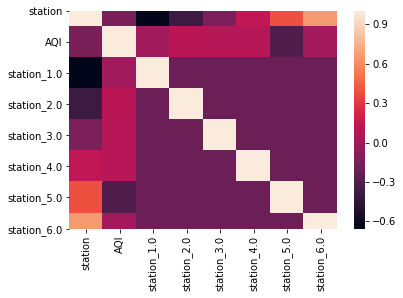

In [129]:
sns.heatmap(corr)
plt.show()

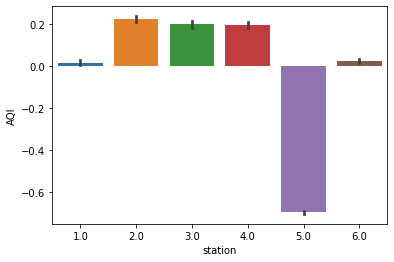

In [139]:
sns.barplot(x='station', y='AQI', data=df_aqi_transformed)

In [155]:
df_aqi_transformed['AQI'].mean

<bound method Series.mean of 0         3.078876
1         2.652978
2         2.774663
3         3.991514
4         5.269208
            ...   
126817   -0.166060
126818   -0.145780
126819   -0.206622
126820   -0.389150
126821   -0.429711
Name: AQI, Length: 126822, dtype: float64>

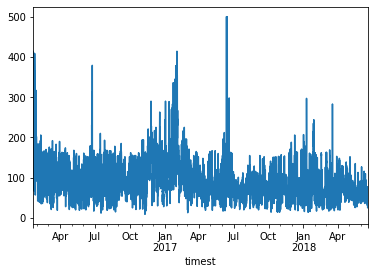

In [205]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
df_aqi = pd.read_csv('dataset/aqi.csv', parse_dates=['timest'])
# Remove nan


df_aqi[df_aqi['station'] == 1 ].set_index("timest")['AQI'].plot()

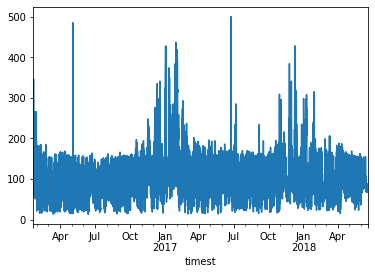

In [206]:
df_aqi[df_aqi['station'] == 2].set_index("timest")['AQI'].plot()

## Plot AQI graph for each station

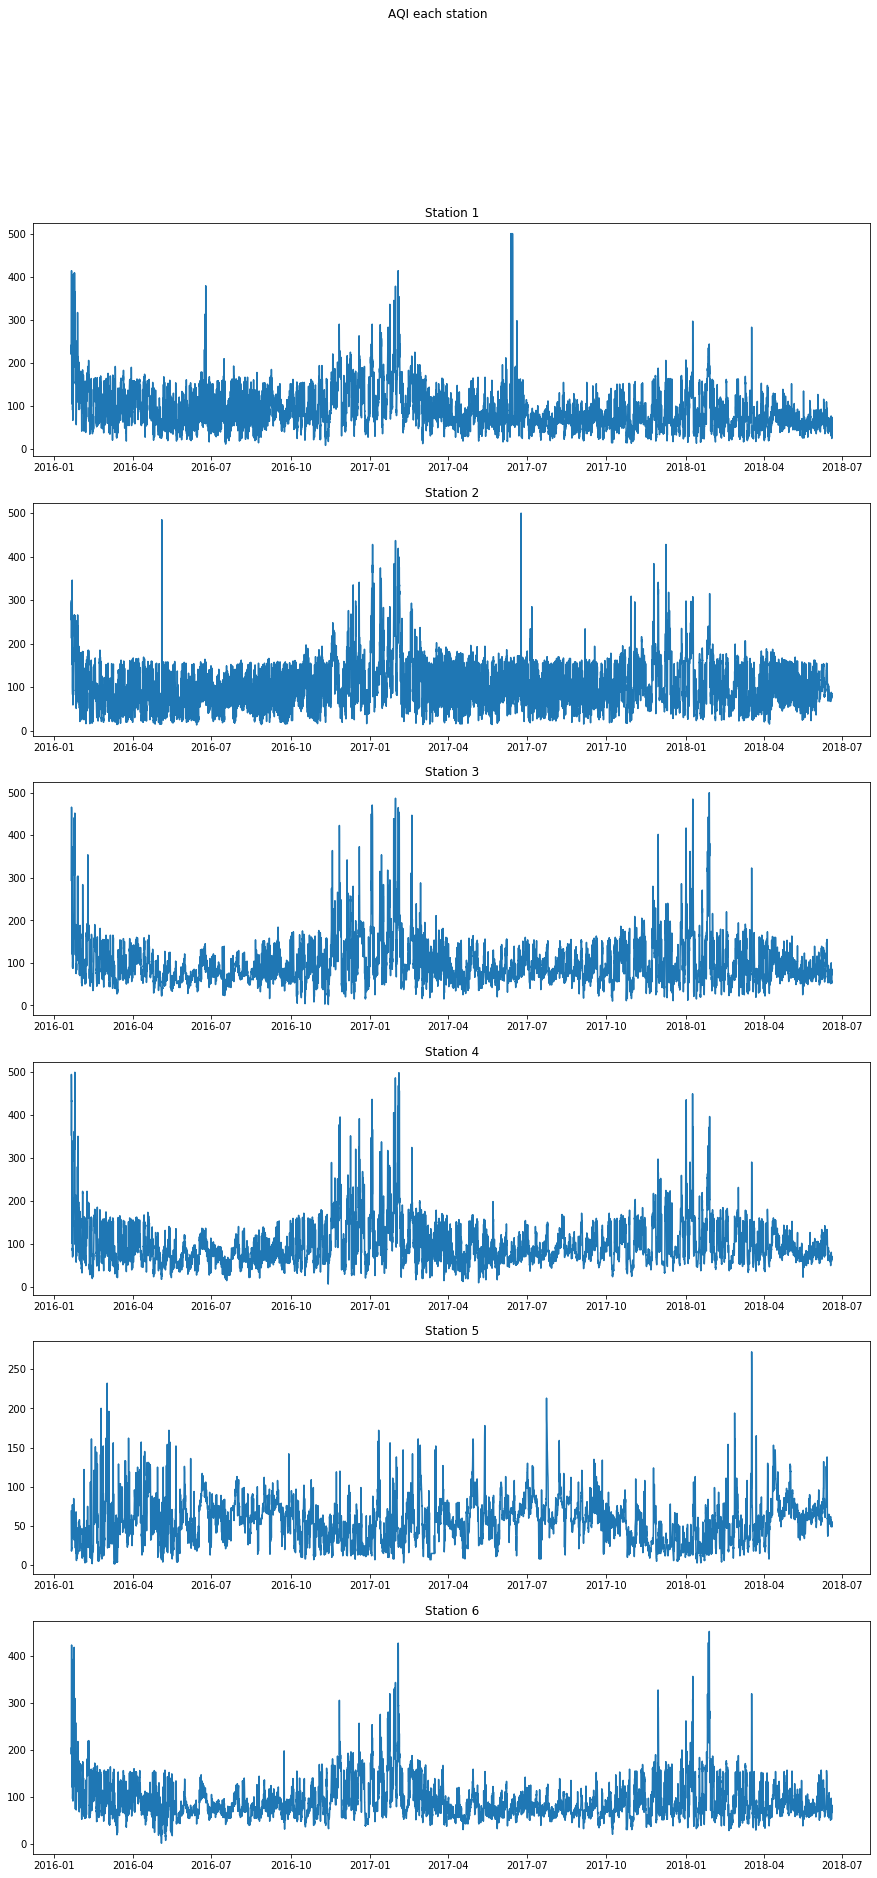

In [220]:
fig, axs = plt.subplots(6,figsize=(15,30))
fig.suptitle('AQI each station')
axs[0].plot(df_aqi[df_aqi['station'] == 1].set_index("timest")['AQI'])
axs[1].plot(df_aqi[df_aqi['station'] == 2].set_index("timest")['AQI'])
axs[2].plot(df_aqi[df_aqi['station'] == 3].set_index("timest")['AQI'])
axs[3].plot(df_aqi[df_aqi['station'] == 4].set_index("timest")['AQI'])
axs[4].plot(df_aqi[df_aqi['station'] == 5].set_index("timest")['AQI'])
axs[5].plot(df_aqi[df_aqi['station'] == 6].set_index("timest")['AQI'])

axs[0].title.set_text('Station 1')
axs[1].title.set_text('Station 2')
axs[2].title.set_text('Station 3')
axs[3].title.set_text('Station 4')
axs[4].title.set_text('Station 5')
axs[5].title.set_text('Station 6')

## Plot PM graph from each station

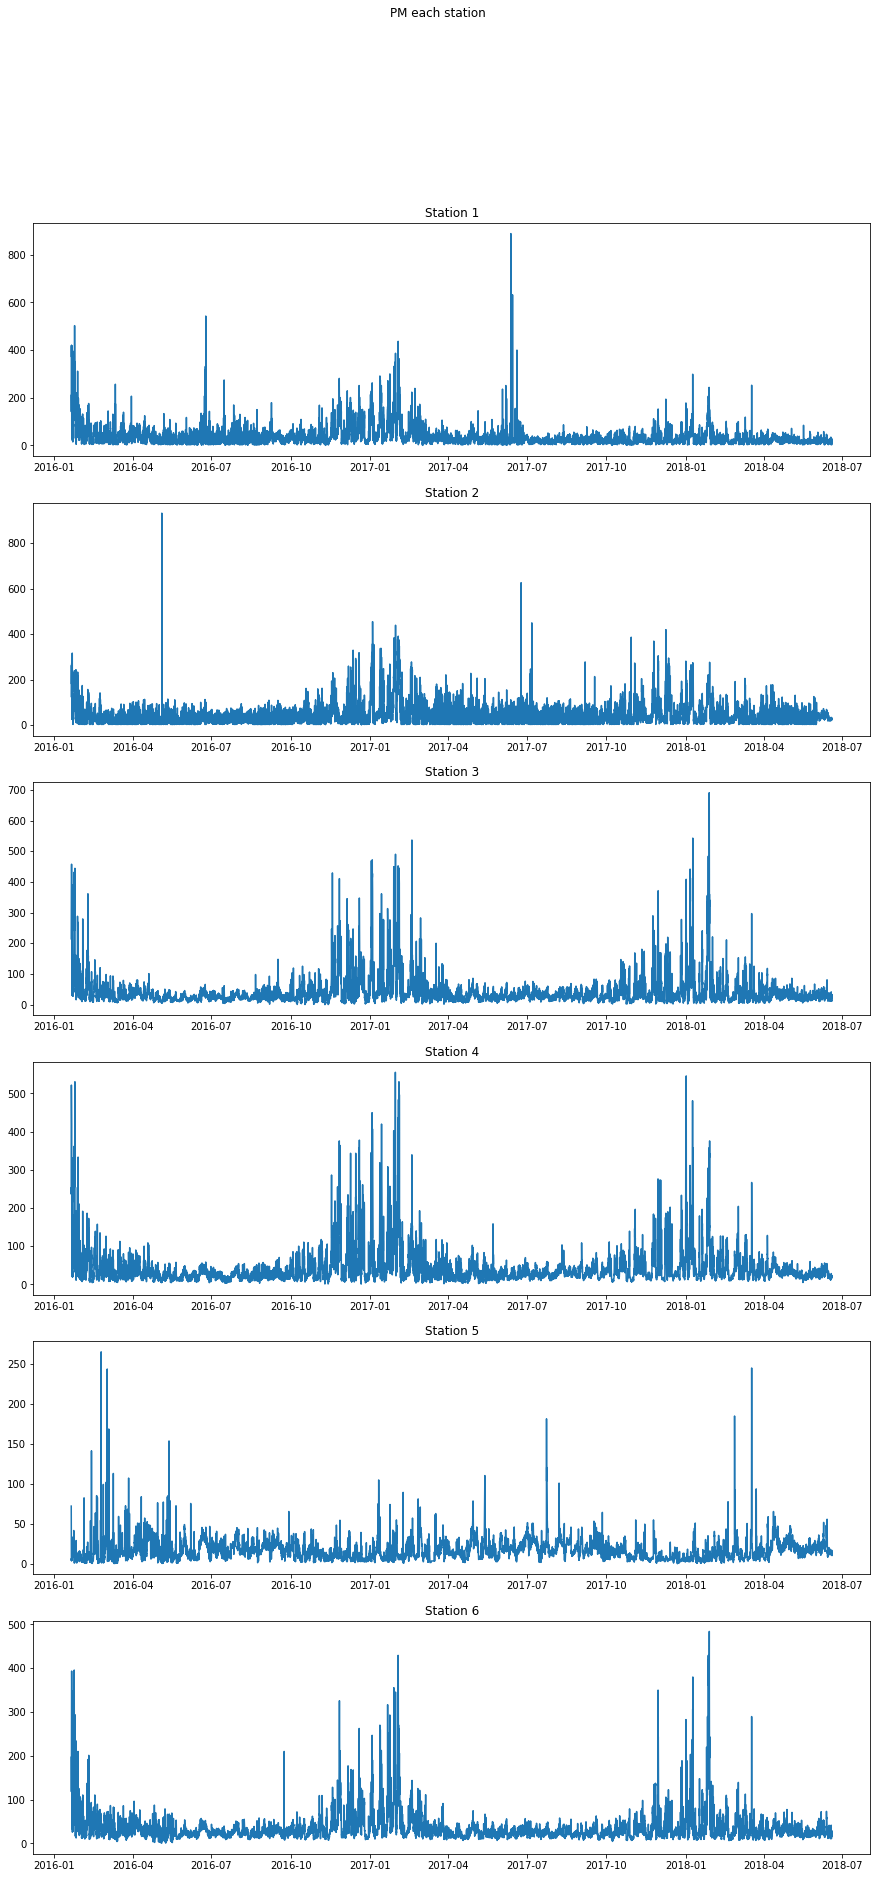

In [221]:
fig, axs = plt.subplots(6,figsize=(15,30))
fig.suptitle('PM each station')
axs[0].plot(df_aqi[df_aqi['station'] == 1].set_index("timest")['PM'])
axs[1].plot(df_aqi[df_aqi['station'] == 2].set_index("timest")['PM'])
axs[2].plot(df_aqi[df_aqi['station'] == 3].set_index("timest")['PM'])
axs[3].plot(df_aqi[df_aqi['station'] == 4].set_index("timest")['PM'])
axs[4].plot(df_aqi[df_aqi['station'] == 5].set_index("timest")['PM'])
axs[5].plot(df_aqi[df_aqi['station'] == 6].set_index("timest")['PM'])

axs[0].title.set_text('Station 1')
axs[1].title.set_text('Station 2')
axs[2].title.set_text('Station 3')
axs[3].title.set_text('Station 4')
axs[4].title.set_text('Station 5')
axs[5].title.set_text('Station 6')

# AQI Prediction

## RandomForest

### Setup the pipeline

**timest** is encoded using sin/cos because it is cyclical features meaning that December ('12') close to January ('1'). So, place it on the unit circle using sin/cos might be the good way to encode them.

**station** is encoded using one-hot encoder

In [74]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

def encode_time_cyclical(datetime_col):
    year_col = datetime_col.apply(lambda x: x.year).values
    month_col = datetime_col.apply(lambda x: x.month).values
    day_col = datetime_col.apply(lambda x: x.day).values
    hour_col = datetime_col.apply(lambda x: x.hour).values
    month_sin = np.sin(2*np.pi*(month_col/12)).reshape(-1,1)
    month_cos = np.cos(2*np.pi*(month_col/12)).reshape(-1,1)
    day_sin = np.sin(2*np.pi*(day_col/31)).reshape(-1,1)
    day_cos = np.cos(2*np.pi*(day_col/31)).reshape(-1,1)
    hour_sin = np.sin(2*np.pi*(hour_col/24)).reshape(-1,1)
    hour_cos = np.cos(2*np.pi*(hour_col/24)).reshape(-1,1)
    return np.concatenate([month_sin, month_cos, day_sin, day_cos, hour_sin, hour_cos], axis=1)

transformer = ColumnTransformer(
    [('cyclic_time_encoder', FunctionTransformer(encode_time_cyclical), 'timest'),
     ('station_encoder', OneHotEncoder(), ['station'])],
    remainder='drop'
)

model_rf = Pipeline([
    ('column_transformer', transformer),
    ('estimator', RandomForestRegressor(random_state=42, n_jobs=-1))
])

### Load dataset

In [75]:
df_aqi = pd.read_csv('dataset/aqi.csv', parse_dates=['timest'])
# Remove nan
df_aqi = df_aqi[['timest', 'station', 'AQI']].dropna()

### Split the data to train and test set

In [76]:
from sklearn.model_selection import train_test_split

X = df_aqi.drop('AQI', axis=1)
y = df_aqi['AQI']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

### Cross validate the default model

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_rf, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
print("RMSE score: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()*2))

RMSE score: 44.04 (+/- 0.77)


### Hyperparameter Tunning using RandomizedSearch

Find hyperparameter to improve the model performance

Define the grid for search

In [79]:
# Number of trees in random forest
n_estimators = np.linspace(100, 500, num=5, dtype=int).tolist()

# Maximum number of levels in tree
max_depth = np.linspace(10,50, num=5, dtype=int).tolist()
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {
    'estimator__n_estimators': n_estimators,
    'estimator__max_depth': max_depth,
    'estimator__min_samples_split': min_samples_split,
    'estimator__min_samples_leaf': min_samples_leaf,
}
random_grid

{'estimator__n_estimators': [100, 200, 300, 400, 500],
 'estimator__max_depth': [10, 20, 30, 40, 50, None],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__min_samples_leaf': [1, 2, 4]}

Start the searching for 10 iteration

In [80]:
from sklearn.model_selection import RandomizedSearchCV

model_random = RandomizedSearchCV(
    estimator=model_rf, 
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1,
    iid=False,
    scoring='neg_root_mean_squared_error'
)

model_random.fit(X_train, y_train)
model_random.best_params_

C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



{'estimator__n_estimators': 100,
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 4,
 'estimator__max_depth': 10}

### Cross Validate the best estimator

In [81]:
rf = model_random.best_estimator_

scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
print("RMSE score: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()*2))

RMSE score: 37.39 (+/- 0.97)


RMSE decrease from 44.04 -> 37.39

In [82]:
import joblib

joblib.dump(rf, "model/random_forest.pkl")

['model/random_forest.pkl']

### Evaluation
Load dataset and model

In [83]:
import joblib
from sklearn.model_selection import train_test_split

def encode_time_cyclical(datetime_col):
    year_col = datetime_col.apply(lambda x: x.year).values
    month_col = datetime_col.apply(lambda x: x.month).values
    day_col = datetime_col.apply(lambda x: x.day).values
    hour_col = datetime_col.apply(lambda x: x.hour).values
    month_sin = np.sin(2*np.pi*(month_col/12)).reshape(-1,1)
    month_cos = np.cos(2*np.pi*(month_col/12)).reshape(-1,1)
    day_sin = np.sin(2*np.pi*(day_col/31)).reshape(-1,1)
    day_cos = np.cos(2*np.pi*(day_col/31)).reshape(-1,1)
    hour_sin = np.sin(2*np.pi*(hour_col/24)).reshape(-1,1)
    hour_cos = np.cos(2*np.pi*(hour_col/24)).reshape(-1,1)
    return np.concatenate([month_sin, month_cos, day_sin, day_cos, hour_sin, hour_cos], axis=1)

model_rf = joblib.load("model/random_forest.pkl")
df_aqi = pd.read_csv("dataset/aqi.csv", parse_dates=['timest'])
df_aqi = df_aqi[['timest', 'station', 'AQI']].dropna()
X = df_aqi.drop('AQI', axis=1)
y = df_aqi['AQI']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [84]:
from sklearn.metrics import mean_squared_error

y_pred = model_rf.predict(X_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {score}")

RMSE: 37.41852767579251


C:\Users\Sunat\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



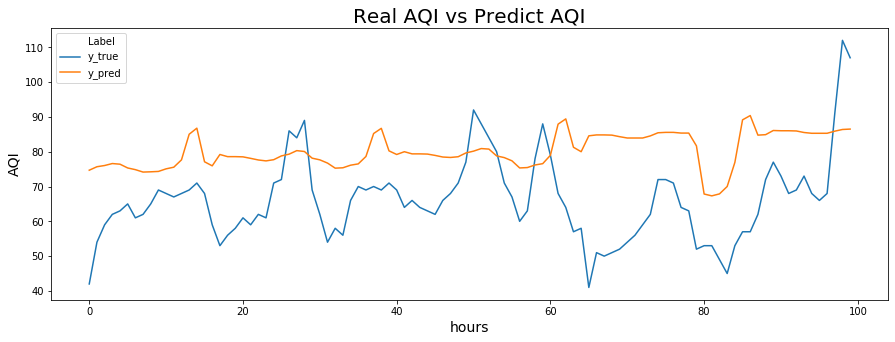

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df_aqi[df_aqi['station'] == 1][14797:14897]
X = df1.drop('AQI', axis=1)
y = df1['AQI']

y_pred = model_rf.predict(X)
y_test_station1 = y.values
y_pred_station1 = y_pred

label_true = ['y_true'] * y_test_station1.shape[0]
label_pred = ['y_pred'] * y_pred_station1.shape[0]
true_pred_aqi = pd.DataFrame({'AQI':np.concatenate([y_test_station1, y_pred_station1]), 'Label': label_true + label_pred})

_, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=list(range(0,100))+list(range(0,100)), y='AQI', data=true_pred_aqi, hue='Label', ax=ax)
plt.title("Real AQI vs Predict AQI", fontsize=20)
plt.xlabel("hours", fontsize=14)
plt.ylabel("AQI", fontsize=14)
plt.show()

## Recurrent Neural Network with LSTM

### Load the data from previous step

In [86]:
# Load the data
df_aqi = pd.read_csv('dataset/aqi.csv')
df_aqi

,Unnamed: 0,timest,AQI,station,Atmosphere Pressure,C6H6,CO,Humidity,NO,NO2,...,Temperature,Wind,year,moth_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,PM
0,0,2016-01-20 16:00:00,NaN,1.0,926.83,7.47,NaN,66.90,14.74,81.79,...,-8.43,1.42,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,-5.000000e-01,209.94
1,1,2016-01-20 17:00:00,NaN,1.0,926.83,7.68,NaN,75.32,9.47,89.16,...,-11.73,1.38,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,-2.588190e-01,192.27
2,2,2016-01-20 18:00:00,241.0,1.0,926.83,8.00,NaN,80.47,12.63,98.74,...,-13.80,1.19,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,176.80
3,3,2016-01-20 19:00:00,220.0,1.0,926.83,7.16,NaN,83.27,51.58,120.11,...,-14.41,0.91,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.965926,2.588190e-01,141.44
4,4,2016-01-20 20:00:00,226.0,1.0,926.83,10.00,NaN,85.15,198.95,139.26,...,-14.66,1.17,2016.0,5.000000e-01,0.866025,-0.790776,-0.612106,-0.866025,5.000000e-01,185.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126829,21134,2018-06-19 06:00:00,81.0,6.0,NaN,1.03,0.14,79.57,3.91,18.16,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,1.000000,6.123234e-17,28.20
126830,21135,2018-06-19 07:00:00,82.0,6.0,NaN,1.83,0.29,78.72,12.48,27.89,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.965926,-2.588190e-01,27.59
126831,21136,2018-06-19 08:00:00,79.0,6.0,NaN,2.32,0.35,76.60,16.52,33.16,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.866025,-5.000000e-01,23.17
126832,21137,2018-06-19 09:00:00,70.0,6.0,NaN,2.18,0.27,70.21,9.64,27.89,...,0.00,0.00,2018.0,1.224647e-16,-1.000000,-0.651372,-0.758758,0.707107,-7.071068e-01,15.55


### Feature Selection

we selected two features which are **station** and **AQI** to train RNN

In [87]:
df_aqi = df_aqi[['station','AQI']]
df_aqi = df_aqi.dropna()
df_aqi

,station,AQI
2,1.0,241.0
3,1.0,220.0
4,1.0,226.0
5,1.0,286.0
6,1.0,349.0
...,...,...
126829,6.0,81.0
126830,6.0,82.0
126831,6.0,79.0
126832,6.0,70.0


### Standardization

we standardize the AQI columns using sklearn Standard Scaler  

we split data to the trainning set (2 years) for fitting the StandardScaler to prevent the information of testing set leak into the model

In [88]:
TRAIN_SIZE = 17070 # 2 years

# Split training data for fitting the StandardScaler
train_data = []
for i in range(1,7):
    aqi = df_aqi.loc[df_aqi['station'] == i,'AQI']
    aqi = aqi[:TRAIN_SIZE].values
    train_data.append(aqi.reshape(-1,1))
    
train_data = np.vstack(train_data)
train_data.shape

(102420, 1)

Then fit the scaler and save for later use

In [89]:
from sklearn.preprocessing import StandardScaler
import pickle
import os

# Fit the scaler
scaler = StandardScaler()
scaler.fit(train_data)

# Save for later use
filename = 'model/scaler.pkl'
dirname = os.path.dirname(filename)
if not os.path.exists(dirname):
    os.makedirs(dirname)
with open(filename, 'wb') as file:
    pickle.dump(scaler,file)

Standardize the AQI column

In [90]:
df_aqi_scaled = df_aqi.copy()

df_aqi_scaled['AQI'] = scaler.transform(df_aqi['AQI'].values.reshape(-1,1)).flatten()
df_aqi_scaled

,station,AQI
2,1.0,3.078876
3,1.0,2.652978
4,1.0,2.774663
5,1.0,3.991514
6,1.0,5.269208
...,...,...
126829,6.0,-0.166060
126830,6.0,-0.145780
126831,6.0,-0.206622
126832,6.0,-0.389150


### Feature Encoding

we encode the station column which is categorical feature using one-hot encoder (get_dummies for pandas)

In [91]:
dummies = pd.get_dummies(df_aqi['station'], prefix="station")
df_aqi_dummies = pd.concat([df_aqi_scaled,dummies], axis=1)
df_aqi_dummies

,station,AQI,station_1.0,station_2.0,station_3.0,station_4.0,station_5.0,station_6.0
2,1.0,3.078876,1,0,0,0,0,0
3,1.0,2.652978,1,0,0,0,0,0
4,1.0,2.774663,1,0,0,0,0,0
5,1.0,3.991514,1,0,0,0,0,0
6,1.0,5.269208,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
126829,6.0,-0.166060,0,0,0,0,0,1
126830,6.0,-0.145780,0,0,0,0,0,1
126831,6.0,-0.206622,0,0,0,0,0,1
126832,6.0,-0.389150,0,0,0,0,0,1


### Data Transformation

For this model, we will use the past-168 hours's AQI (1 week) to predict next hour's AQI. Therefore, we must transform the data to (x=\[past-168 hours's AQI\], y=next hours AQI)

In [92]:
def windowing_data(dataset, target, start_index, end_index, history_size, target_size, single_step=False):
    data = []
    labels = []
    
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(dataset[indices])
        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

def split_and_windowing(data, train_size, history_size, target_size, single_step=False):
    # Drop the unused column
    df_selected = data.drop(['station'], axis=1)
    
    # Pandas DataFrame to numpy array
    data_numpy = df_selected.values
    target = df_selected['AQI'].values
    
    # Split data and transform
    x_train, y_train = windowing_data(data_numpy, target, 0, train_size, history_size, target_size, single_step)
    x_test, y_test = windowing_data(data_numpy, target, train_size, None, history_size, target_size, single_step)
    
    return x_train, y_train, x_test, y_test

Transform the data for each station (prevent past history AQI from one station from mixing with past history AQI from another station)

In [93]:
x_train_set = []
y_train_set = []
x_test_set = []
y_test_set = []

HISTORY = 168 # 1 weeks
TRAIN_SIZE = 17070 # 2 years

for i in range(1,7):
    data = df_aqi_dummies[df_aqi_scaled['station'] == i]
    x_train, y_train, x_test, y_test = split_and_windowing(data, TRAIN_SIZE, HISTORY, 0, True)
    x_train_set.append(x_train)
    y_train_set.append(y_train)
    x_test_set.append(x_test)
    y_test_set.append(y_test)

print(x_train_set[0].shape)

(16902, 168, 7)


Stack them back to one training and testing set

In [94]:
x_train = np.vstack(x_train_set)
y_train = np.hstack(y_train_set)
x_test = np.vstack(x_test_set)
y_test = np.hstack(y_test_set)

x_train.shape

(101412, 168, 7)

In [122]:
print ('Single window of past history')
print (x_train[100000])
print ('\n Target AQI to predict')
print (y_train[100000])

Single window of past history
[[-0.40943063  0.          0.         ...  0.          0.
   1.        ]
 [-0.44999233  0.          0.         ...  0.          0.
   1.        ]
 [-0.36886893  0.          0.         ...  0.          0.
   1.        ]
 ...
 [ 1.2941609   0.          0.         ...  0.          0.
   1.        ]
 [ 1.31444175  0.          0.         ...  0.          0.
   1.        ]
 [ 1.2535992   0.          0.         ...  0.          0.
   1.        ]]

 Target AQI to predict
1.0305098287759287


In [96]:
# Save for later use
np.save("dataset/lstm_x_train.npy", x_train)
np.save("dataset/lstm_y_train.npy", y_train)
np.save("dataset/lstm_x_test.npy", x_test)
np.save("dataset/lstm_y_test.npy", y_test)

**Warnning**: These files are very large (> 1GB)

### Train the model

_The model was trained using GPU from Colab_

In [97]:
import tensorflow as tf
tf.random.set_seed(42) # Set the seed to make output reproduceable

BATCH_SIZE = 256
BUFFER_SIZE = 10000

# Convert numpy array to tensorflow Dataset

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_data = val_data.batch(BATCH_SIZE).repeat()

First, we will start with no hidden layer. Only input layer (LSTM) with 32 nodes and output layers with one node

In [98]:
def build_model(input_shape, output_number, LSTM_1=32):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(LSTM_1, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.Dense(output_number))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

Fit the model!

In [99]:
EVALUATION_INTERVAL = 100
EPOCHS = 10

model = build_model(x_train.shape[-2:], 1)
model_history = model.fit(
    train_data, 
    epochs=EPOCHS,
    steps_per_epoch=EVALUATION_INTERVAL,
    validation_data=val_data,
    validation_steps=50
)

Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 27s 272ms/step - loss: 0.6724 - root_mean_squared_error: 0.9311 - val_loss: 0.6778 - val_root_mean_squared_error: 0.9892
Epoch 2/10
100/100 [==============================] - 26s 260ms/step - loss: 0.7158 - root_mean_squared_error: 1.0292 - val_loss: 0.6822 - val_root_mean_squared_error: 0.9772
Epoch 3/10
100/100 [==============================] - 26s 264ms/step - loss: 0.5901 - root_mean_squared_error: 0.8440 - val_loss: 0.6631 - val_root_mean_squared_error: 0.9805
Epoch 4/10
100/100 [==============================] - 26s 256ms/step - loss: 0.4936 - root_mean_squared_error: 0.7087 - val_loss: 0.6616 - val_root_mean_squared_error: 0.9808
Epoch 5/10
100/100 [==============================] - 26s 258ms/step - loss: 0.6706 - root_mean_squared_error: 0.9335 - val_loss: 0.6700 - val_root_mean_squared_error: 0.9839
Epoch 6/10
100/100 [==============================] - 27s 265ms/step - loss: 0.711

In [100]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

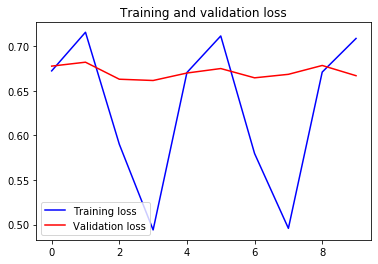

In [101]:
plot_train_history(model_history, 'Training and validation loss')

From the plot, the loss and rmse is quite high, so we increase the number of node in the input layers to 128

In [102]:
model = build_model(x_train.shape[-2:], 1, 128)
model_history = model.fit(
    train_data, 
    epochs=EPOCHS,
    steps_per_epoch=EVALUATION_INTERVAL,
    validation_data=val_data,
    validation_steps=50
)

Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 55s 550ms/step - loss: 0.6689 - root_mean_squared_error: 0.9241 - val_loss: 0.6753 - val_root_mean_squared_error: 0.9732
Epoch 2/10
100/100 [==============================] - 55s 548ms/step - loss: 0.7067 - root_mean_squared_error: 1.0201 - val_loss: 0.6847 - val_root_mean_squared_error: 0.9762
Epoch 3/10
100/100 [==============================] - 53s 528ms/step - loss: 0.5921 - root_mean_squared_error: 0.8500 - val_loss: 0.6693 - val_root_mean_squared_error: 0.9821
Epoch 4/10
100/100 [==============================] - 53s 527ms/step - loss: 0.4918 - root_mean_squared_error: 0.7048 - val_loss: 0.6739 - val_root_mean_squared_error: 0.9823
Epoch 5/10
100/100 [==============================] - 55s 546ms/step - loss: 0.6715 - root_mean_squared_error: 0.9386 - val_loss: 0.6716 - val_root_mean_squared_error: 0.9711
Epoch 6/10
100/100 [==============================] - 54s 543ms/step - loss: 0.705

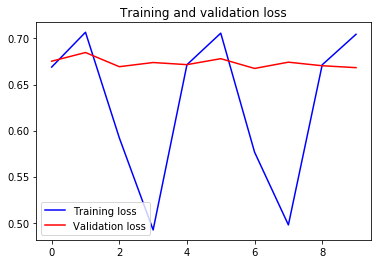

In [103]:
plot_train_history(model_history, 'Training and validation loss')

The loss and rmse is higher than previous model 😱. Increasing the number of node might not be the good way.

We will try to add a hidden layer (LSTM) instead.

In [104]:
def build_model_hidden_layer(input_shape, output_number, LSTM_1=32, LSTM_2=16):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(LSTM_1, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.LSTM(LSTM_2))
    model.add(tf.keras.layers.Dense(output_number))

    model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [105]:
model = build_model_hidden_layer(x_train.shape[-2:], 1, 128,64)
model_history = model.fit(
    train_data, 
    epochs=EPOCHS,
    steps_per_epoch=EVALUATION_INTERVAL,
    validation_data=val_data,
    validation_steps=50
)

Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 98s 984ms/step - loss: 0.3552 - root_mean_squared_error: 0.5014 - val_loss: 0.3084 - val_root_mean_squared_error: 0.3733
Epoch 2/10
100/100 [==============================] - 92s 923ms/step - loss: 0.1791 - root_mean_squared_error: 0.2709 - val_loss: 0.1692 - val_root_mean_squared_error: 0.2620
Epoch 3/10
100/100 [==============================] - 91s 911ms/step - loss: 0.1112 - root_mean_squared_error: 0.1816 - val_loss: 0.1551 - val_root_mean_squared_error: 0.2451
Epoch 4/10
100/100 [==============================] - 91s 909ms/step - loss: 0.0862 - root_mean_squared_error: 0.1509 - val_loss: 0.1609 - val_root_mean_squared_error: 0.2438
Epoch 5/10
100/100 [==============================] - 92s 924ms/step - loss: 0.2042 - root_mean_squared_error: 0.3097 - val_loss: 0.1544 - val_root_mean_squared_error: 0.2420
Epoch 6/10
100/100 [==============================] - 90s 901ms/step - loss: 0.143

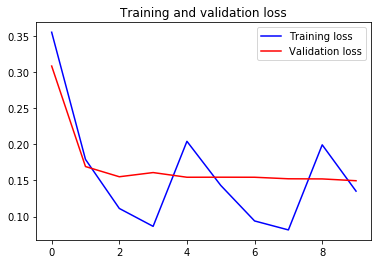

In [106]:
plot_train_history(model_history, 'Training and validation loss')

The loss and rmse are greatly reduced! So we will stop here.

In [107]:
# Save model for later use
model.save("lstm_model.h5")

### Evaluation

In [108]:
import tensorflow as tf
import pickle
tf.random.set_seed(42)

# Load the scaler
with open("model/scaler.pkl", "rb") as file:
    scaler = pickle.load(file)
print(scaler)

# Load the test data
x_test = np.load("dataset/lstm_x_test.npy")
y_test = np.load("dataset/lstm_y_test.npy")

print(x_test.shape, y_test.shape)

# Load the model from the previous step
lstm_model = tf.keras.models.load_model('model/lstm_model.h5')

lstm_model.summary()

StandardScaler(copy=True, with_mean=True, with_std=True)
(23394, 168, 7) (23394,)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 168, 128)          69632     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 119,105
Trainable params: 119,105
Non-trainable params: 0
_________________________________________________________________


Predict using test dataset

In [109]:
y_pred = lstm_model.predict(x_test, batch_size=256)
print(y_pred.shape)

(23394, 1)


Scale the y_pred and y_test to original scale

In [110]:
y_pred_scaled = scaler.inverse_transform(y_pred).flatten()
y_test_scaled = scaler.inverse_transform(y_test)

y_pred_scaled, y_test_scaled

(array([148.26482, 168.34233, 172.17313, ...,  82.17731,  77.03799,
         65.14071], dtype=float32),
 array([164., 171., 169., ...,  79.,  70.,  68.]))

In [111]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"root mean square error = {score}")

root mean square error = 9.46888062198889


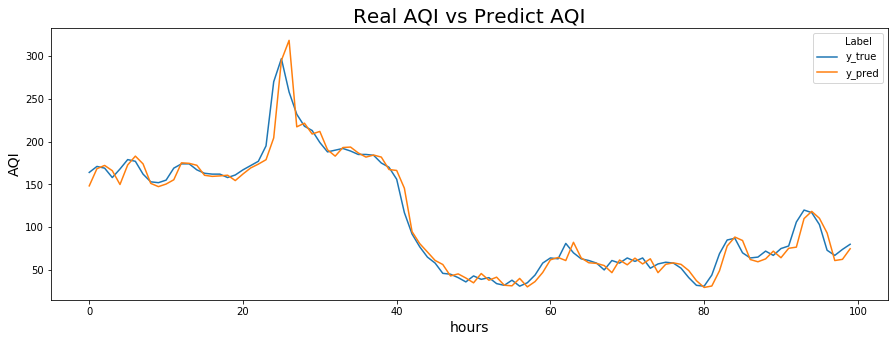

In [112]:
import plotly.express as px

y_test_station1 = y_test_scaled[:100]
y_pred_station1 = y_pred_scaled[:100]

label_true = ['y_true'] * y_test_station1.shape[0]
label_pred = ['y_pred'] * y_pred_station1.shape[0]
true_pred_aqi = pd.DataFrame({'AQI':np.concatenate([y_test_station1, y_pred_station1]), 'Label': label_true + label_pred})

_, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=list(range(0,100))+list(range(0,100)), y='AQI', data=true_pred_aqi, hue='Label', ax=ax)
plt.title("Real AQI vs Predict AQI", fontsize=20)
plt.xlabel("hours", fontsize=14)
plt.ylabel("AQI", fontsize=14)
plt.show()

# AQI Forecasting

## Load Tensorflow model

In [114]:
import tensorflow as tf
import pickle

tf.random.set_seed(42)

# Load the scaler
with open("model/scaler.pkl", "rb") as file:
    scaler = pickle.load(file)
print(scaler)

# Load the model from the previous step
lstm_model = tf.keras.models.load_model('model/lstm_model.h5')

lstm_model.summary()

StandardScaler(copy=True, with_mean=True, with_std=True)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 168, 128)          69632     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 119,105
Trainable params: 119,105
Non-trainable params: 0
_________________________________________________________________


## Load the dataset

In [115]:
df_aqi = pd.read_csv("dataset/aqi.csv", parse_dates=['timest'])
df_aqi = df_aqi[['timest', 'station', 'AQI']]
df_aqi

,timest,station,AQI
0,2016-01-20 16:00:00,1.0,NaN
1,2016-01-20 17:00:00,1.0,NaN
2,2016-01-20 18:00:00,1.0,241.0
3,2016-01-20 19:00:00,1.0,220.0
4,2016-01-20 20:00:00,1.0,226.0
...,...,...,...
126829,2018-06-19 06:00:00,6.0,81.0
126830,2018-06-19 07:00:00,6.0,82.0
126831,2018-06-19 08:00:00,6.0,79.0
126832,2018-06-19 09:00:00,6.0,70.0


## Create the DataFrame for next six month

In [116]:
def gen_date(station):
    daterange = pd.date_range("2018-06-19 11:00:00", "2018-12-19 23:00:00", freq="1H")
    return pd.DataFrame({"timest": daterange, "station": station})

## Forecast using Tensorflow RNN

In [117]:
# Transform the data
df_aqi_scaled = df_aqi.dropna().reset_index().drop("index", axis=1)
df_aqi_scaled['AQI'] = scaler.transform(df_aqi_scaled[['AQI']]).flatten()
station_dummies = pd.get_dummies(df_aqi_scaled['station'], prefix="station")
df_aqi_transformed = pd.concat([df_aqi_scaled, station_dummies], axis=1)
df_aqi_transformed

,timest,station,AQI,station_1.0,station_2.0,station_3.0,station_4.0,station_5.0,station_6.0
0,2016-01-20 18:00:00,1.0,3.078876,1,0,0,0,0,0
1,2016-01-20 19:00:00,1.0,2.652978,1,0,0,0,0,0
2,2016-01-20 20:00:00,1.0,2.774663,1,0,0,0,0,0
3,2016-01-20 21:00:00,1.0,3.991514,1,0,0,0,0,0
4,2016-01-20 22:00:00,1.0,5.269208,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
126817,2018-06-19 06:00:00,6.0,-0.166060,0,0,0,0,0,1
126818,2018-06-19 07:00:00,6.0,-0.145780,0,0,0,0,0,1
126819,2018-06-19 08:00:00,6.0,-0.206622,0,0,0,0,0,1
126820,2018-06-19 09:00:00,6.0,-0.389150,0,0,0,0,0,1


In [118]:
HISTORY_SIZE = 168

def _tensorflow_forecast(model, data, forecast_step):
    X = data[data.shape[0]-HISTORY_SIZE:].drop(['station', 'timest'], axis=1).values.reshape(1,168,7)
    res = []
    for _ in range(forecast_step):
        y = model.predict(X)
        res.append(y[0,0])
        new_row = np.hstack([y, X[:,0,1:]])
        X = np.vstack([X[0,1:], new_row]).reshape(1,168,7)
    return res

def LSTM_forecast(model, data):
    forecast_result = []
    for i in range(1,7):
        df_station = data[data['station'] == i]
        forecast_station = gen_date(i)
        result = _tensorflow_forecast(model, df_station, forecast_station.shape[0])
        forecast_station['AQI'] = result
        forecast_result.append(forecast_station)
    return forecast_result

In [119]:
forecast_result = LSTM_forecast(lstm_model, df_aqi_transformed)

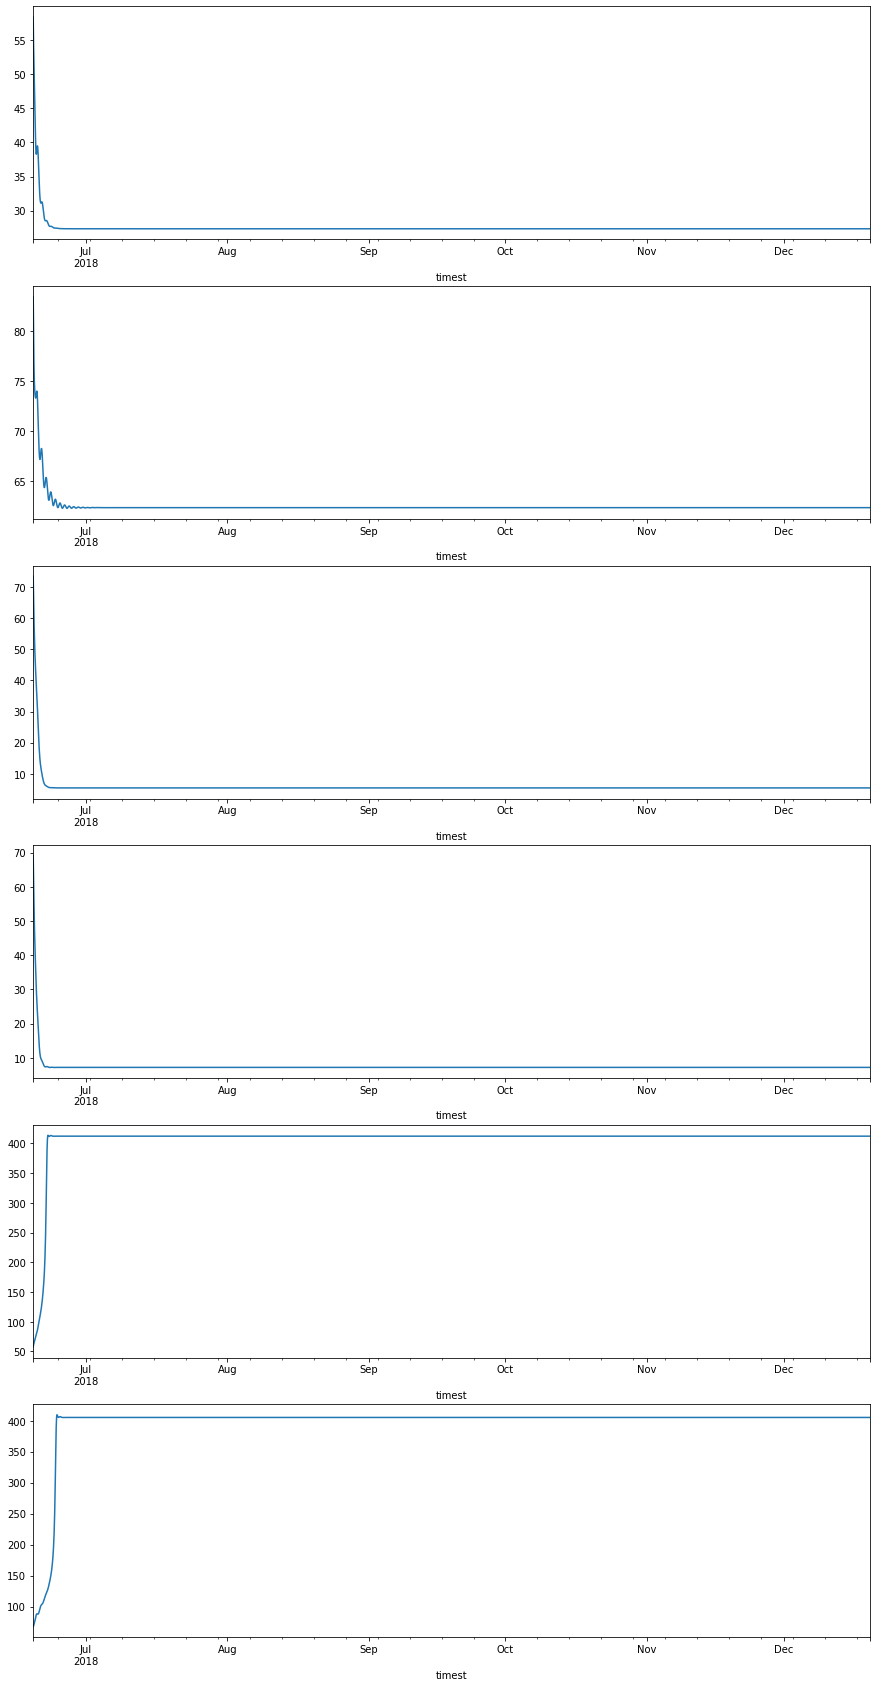

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6,1, figsize=(15,30))
for i, df in enumerate(forecast_result):
    forecast_original_scaled = df.copy()
    forecast_original_scaled['AQI'] = scaler.inverse_transform(df[['AQI']]).flatten()
    forecast_original_scaled = forecast_original_scaled.set_index('timest')
    forecast_original_scaled['AQI'].plot(ax=ax[i])
    
plt.show()

# Conclusion

**Recurrent Neural Network with Long Short Term Memory’s rmse is 9.4688**, while **RandomForest’s rmse is 37.4185** which is higher than RNN. Therefore, the RNN’s performance is higher than RandomForest’s performance. However, the forecasting result from the RNN model is very poor due to insufficient length of the past history windows that use to train the model.